# EDA - Netflix DataSet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#data = pd.read_csv(r"C:\Users\devag\Downloads\netflix_titles.csv")
data = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.shape

(8807, 12)

# Check for Missing Values

In [ ]:
data.isnull().sum()  # Counts the Null values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
(data == '').sum()  # counts empty strings

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
data.isnull().sum() /len(data)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [ ]:
missing_counts = data.isnull().sum()

In [ ]:
missing_counts[missing_counts >= 3]

,0
director,2634
cast,825
country,831
date_added,10
rating,4
duration,3


In [ ]:
data[['director','cast','country']] = data[['director','cast','country']].fillna('Unknown') # Filling the values

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True) # Droping the small values

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
data.shape # Nearly 17 cols are dorped

(8790, 12)

# Checking the Duplicate Values

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data[['show_id','title']].duplicated().sum()

np.int64(0)

No duplicate values

# Count the frequency of categories

In [ ]:
count_cols = ['type', 'country', 'rating', 'listed_in', 'director']

In [ ]:
for i in count_cols:
    print(data[i].value_counts().head(10))
    print("-"*40)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64
----------------------------------------
country
United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64
----------------------------------------
rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64
----------------------------------------
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies       

# Convert Types / Extract Numeric Values

In [ ]:
data['duration'].value_counts()

,count
duration,
1 Season,1791
2 Seasons,421
3 Seasons,198
90 min,152
97 min,146
...,...
228 min,1
18 min,1
205 min,1


In [ ]:
movies = data['type'] == 'Movie'

In [ ]:
movies.sum()

np.int64(6126)

In [ ]:
data.loc[movies, 'duration_min'] = data.loc[movies, 'duration'].str.replace(' min', '')

In [ ]:
data.loc[movies, 'duration_min'] = data.loc[movies, 'duration_min'].astype(int)

In [ ]:
tv_shows = data['type'] == 'TV Show'

In [ ]:
data.loc[tv_shows, 'duration_seasons'] = data.loc[tv_shows, 'duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8790 non-null   object 
 1   type              8790 non-null   object 
 2   title             8790 non-null   object 
 3   director          8790 non-null   object 
 4   cast              8790 non-null   object 
 5   country           8790 non-null   object 
 6   date_added        8790 non-null   object 
 7   release_year      8790 non-null   int64  
 8   rating            8790 non-null   object 
 9   duration          8790 non-null   object 
 10  listed_in         8790 non-null   object 
 11  description       8790 non-null   object 
 12  duration_min      6126 non-null   object 
 13  duration_seasons  2664 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
data['duration_min'] = pd.to_numeric(data['duration_min'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8790 non-null   object 
 1   type              8790 non-null   object 
 2   title             8790 non-null   object 
 3   director          8790 non-null   object 
 4   cast              8790 non-null   object 
 5   country           8790 non-null   object 
 6   date_added        8790 non-null   object 
 7   release_year      8790 non-null   int64  
 8   rating            8790 non-null   object 
 9   duration          8790 non-null   object 
 10  listed_in         8790 non-null   object 
 11  description       8790 non-null   object 
 12  duration_min      6126 non-null   float64
 13  duration_seasons  2664 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.0+ MB


In [ ]:
data['duration_min'].isnull().sum()

np.int64(2664)

In [ ]:
data['duration_seasons'].isnull().sum()

np.int64(6126)

In [ ]:
data['date_added'].head()

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"


In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [ ]:
data['date_added'].head() # IF we require we can make columns as year,months,days

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


# Numerical Analysis

### Analyzing Numerical Columns with Numeric Columns

In [ ]:
# data['release_year'].value_counts().sort_index().min() i have doubt on this

In [ ]:
# data['release_year'].value_counts().sort_index().max() i have doubt on this

In [ ]:
data['year_added'] = data['date_added'].dt.year

In [ ]:
data['year_added'].head()

,year_added
0,2021.0
1,2021.0
2,2021.0
3,2021.0
4,2021.0


In [ ]:
# Numeric Columns

num_cols = data.select_dtypes(include=['int64', 'float64']).columns # include='numeric'
num_cols

Index(['release_year', 'duration_min', 'duration_seasons', 'year_added'], dtype='object')

In [ ]:
for col in num_cols:
    print(col,":")
    print(data[col].min())
    print(data[col].max())
    print(data[col].describe().T)
    print("\n","-"*50)

release_year :
1925
2021
count    8790.000000
mean     2014.183163
std         8.825466
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

 --------------------------------------------------
duration_min :
3.0
312.0
count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

 --------------------------------------------------
duration_seasons :
1.0
17.0
count    2664.000000
mean        1.751877
std         1.550622
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_seasons, dtype: float64

 --------------------------------------------------
year_added :
2008.0
2021.0
count    8702.000000
mean     2018.889681
std         1.567252
min      2008.000000
25%      2018.000000
50%      2019.0000

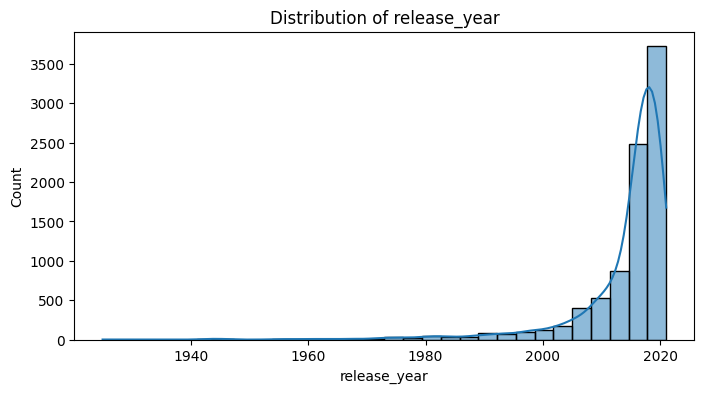

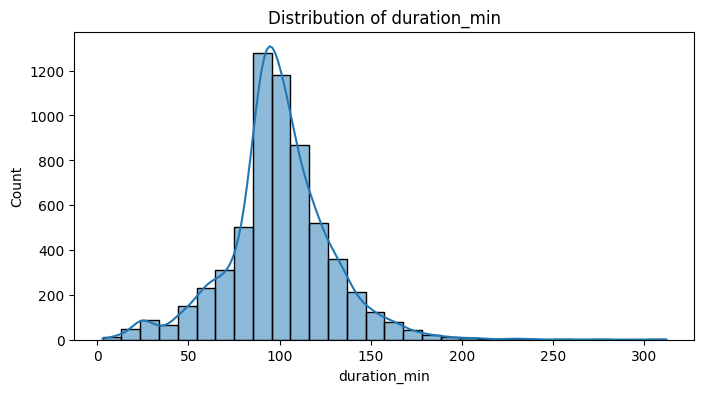

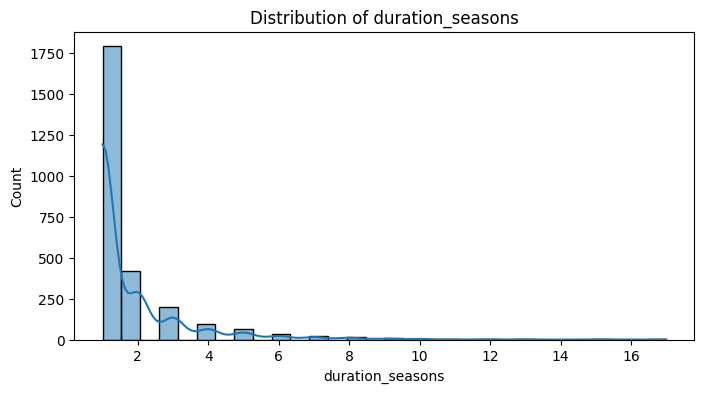

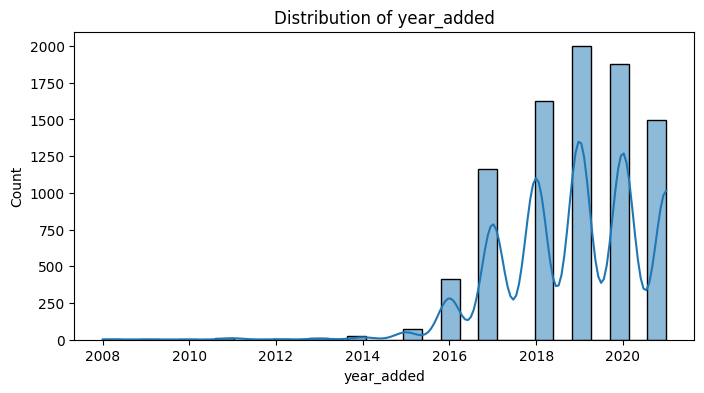

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

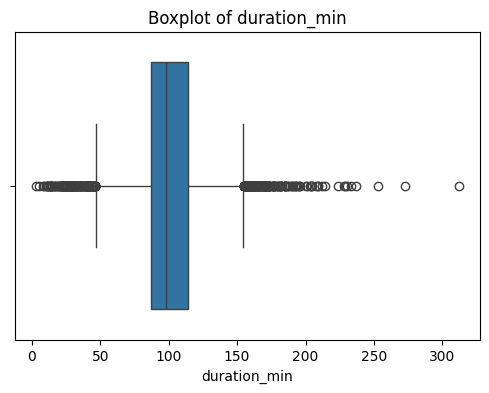

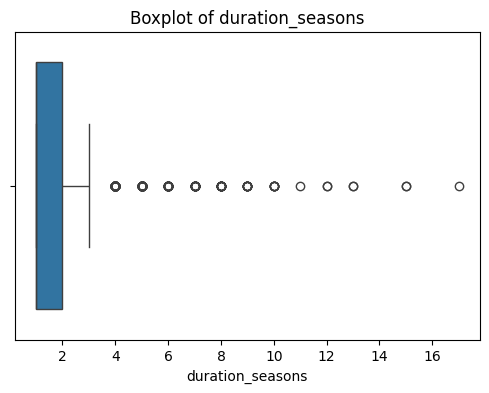

In [ ]:
for col in ['duration_min', 'duration_seasons']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

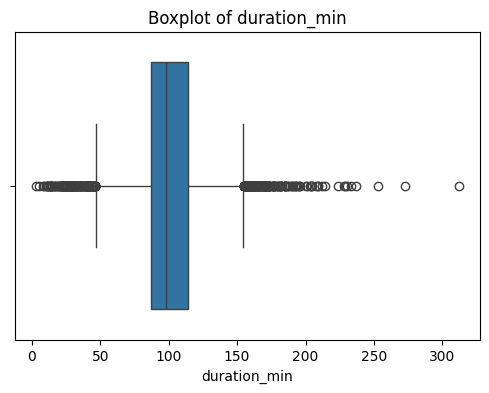

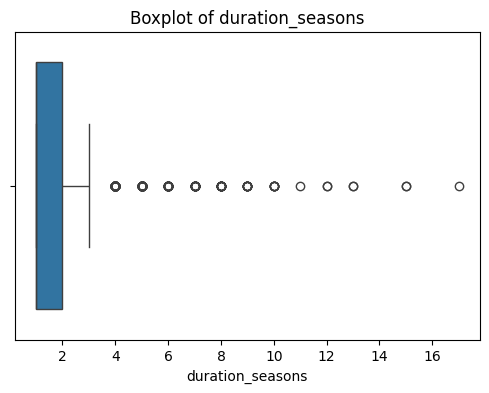

In [ ]:
for col in ['duration_min', 'duration_seasons']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

In [ ]:
data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


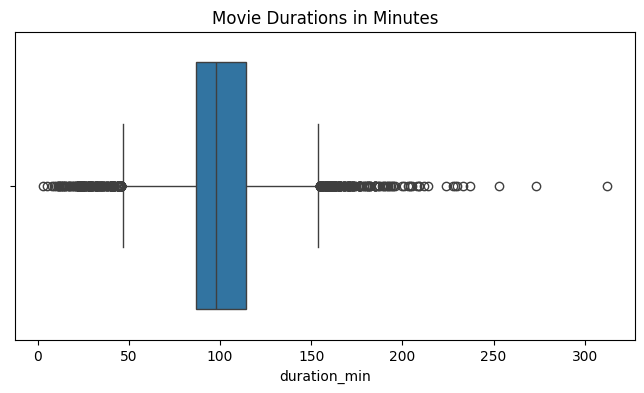

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='duration_min', data=data.dropna(subset=['duration_min']))
plt.title('Movie Durations in Minutes')
plt.show()

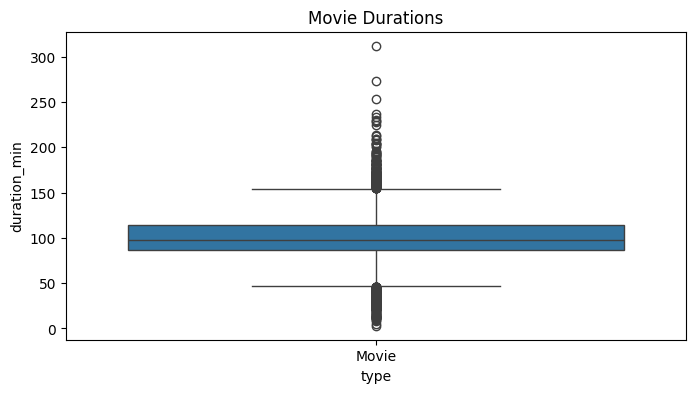

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='type', y='duration_min', data=data[data['type']=='Movie'])
plt.title('Movie Durations')
plt.show()

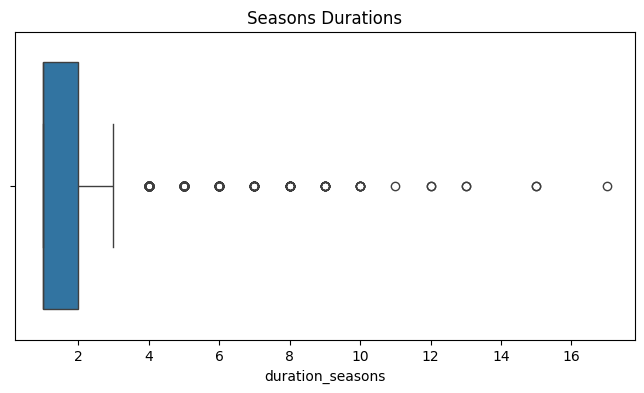

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='duration_seasons', data=data.dropna(subset=['duration_seasons']))
plt.title('Seasons Durations')
plt.show()

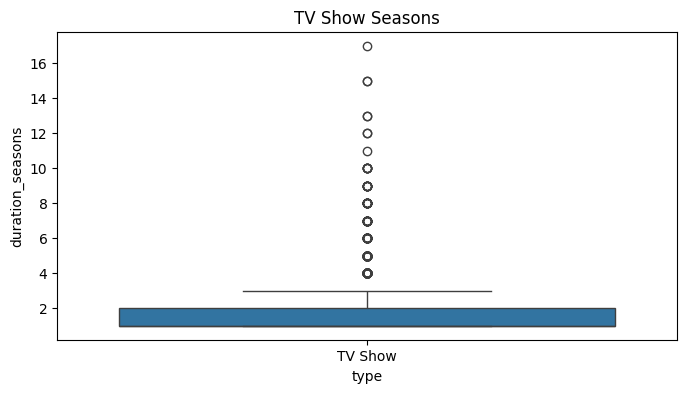

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='type', y='duration_seasons', data=data[data['type']=='TV Show'])
plt.title('TV Show Seasons')
plt.show()

# Movies – Numeric vs Categorical

## PART 1 – Movies : Categorical vs Numeric Analysis

### Step 1: Movies – Numeric vs Rating

In [ ]:
# 1a. Summary Statistics

avg_duration_by_rating = movie_data.groupby('rating')['duration_min'].mean().sort_values(ascending=False)
avg_duration_by_rating


,duration_min
rating,
NC-17,125.000000
TV-14,110.290820
PG-13,108.330612
R,106.720201
UR,106.333333
PG,98.282230
TV-MA,95.889913
TV-PG,94.851852
NR,94.533333


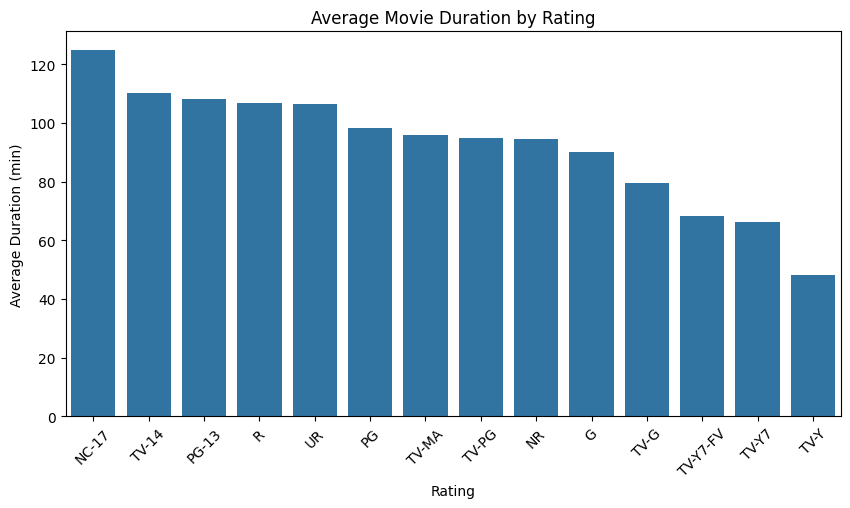

In [ ]:
# 1b. Barplot – Average Duration by Rating

plt.figure(figsize=(10,5))
sns.barplot(x=avg_duration_by_rating.index, y=avg_duration_by_rating.values)
plt.title('Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=45)
plt.show()

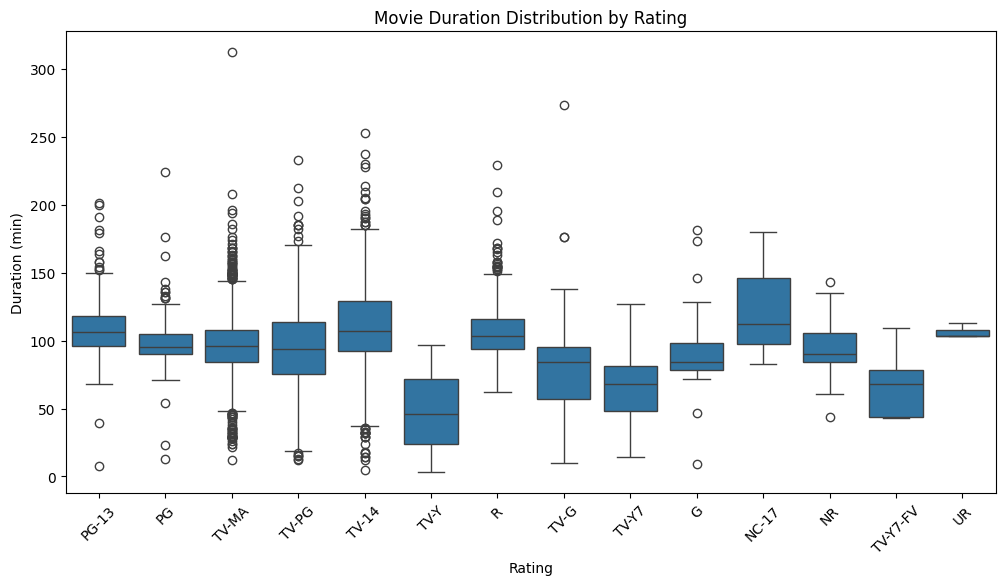

In [ ]:
# 1c. Boxplot – Distribution by Rating

plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='duration_min', data=movie_data)
plt.title('Movie Duration Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)
plt.show()

### Step 2 – Movies: Numeric vs Country

In [ ]:
# Top Countries by Movie Count

top_countries = movie_data['country'].value_counts().head(10).index
print(top_countries)


Index(['United States', 'India', 'Unknown', 'United Kingdom', 'Canada',
       'Spain', 'Egypt', 'Nigeria', 'Indonesia', 'Turkey'],
      dtype='object', name='country')


In [ ]:
# 2b. Summary Statistics

avg_duration_by_country = movie_data[movie_data['country'].isin(top_countries)].groupby('country')['duration_min'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)
print(avg_duration_by_country)


                      mean  median  count
country                                  
India           126.922732   127.0    893
Indonesia       108.831169   107.0     77
Egypt           108.141304   101.0     92
Turkey          107.421053   104.0     76
Nigeria         107.034884   105.5     86
Spain           100.051546    99.0     97
United States    90.629684    92.0   2055
Unknown          87.496583    88.0    439
United Kingdom   84.868932    91.0    206
Canada           82.729508    89.0    122


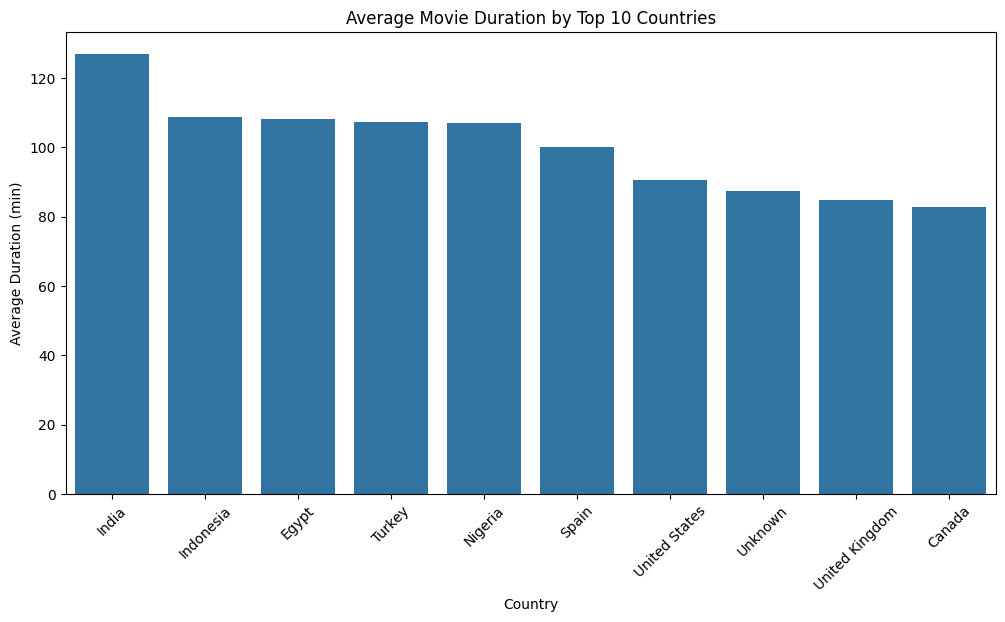

In [ ]:
# 2c. Barplot – Average Duration by Country

plt.figure(figsize=(12,6))
sns.barplot(x=avg_duration_by_country.index, y=avg_duration_by_country['mean'])
plt.title('Average Movie Duration by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=45)
plt.show()


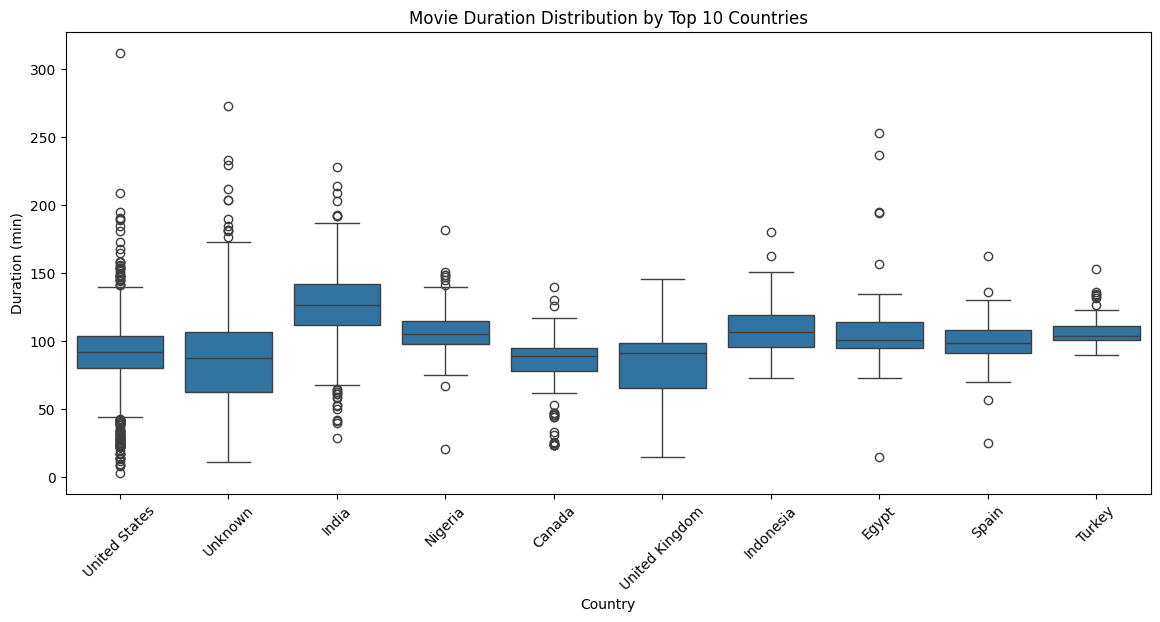

In [ ]:
# 2d. Boxplot – Distribution by Country

plt.figure(figsize=(14,6))
sns.boxplot(x='country', y='duration_min', data=movie_data[movie_data['country'].isin(top_countries)])
plt.title('Movie Duration Distribution by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)
plt.show()


### Step 3 – Movies: Numeric vs Genre

In [ ]:
# Split genres into separate rows
movie_genres = movie_data['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
movie_genre_df = movie_data.join(movie_genres.rename('genre'))


In [ ]:
# 3b. Top Genres by Movie Count

top_genres = movie_genre_df['genre'].value_counts().head(10)
print(top_genres)

genre
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


In [ ]:
# 3c. Summary Statistics

avg_duration_by_genre = movie_genre_df[movie_genre_df['genre'].isin(top_genres.index)].groupby('genre')['duration_min'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)
print(avg_duration_by_genre)


                                mean  median  count
genre                                              
Action & Adventure        113.515716   108.0    859
Dramas                    113.050289   109.0   2426
Romantic Movies           110.573052   107.0    616
International Movies      110.349927   107.0   2752
Thrillers                 107.166378   103.0    577
Music & Musicals          106.125333   101.0    375
Comedies                  103.876344   101.0   1674
Independent Movies        101.051587    98.0    756
Documentaries              81.630610    86.0    869
Children & Family Movies   79.936037    87.0    641


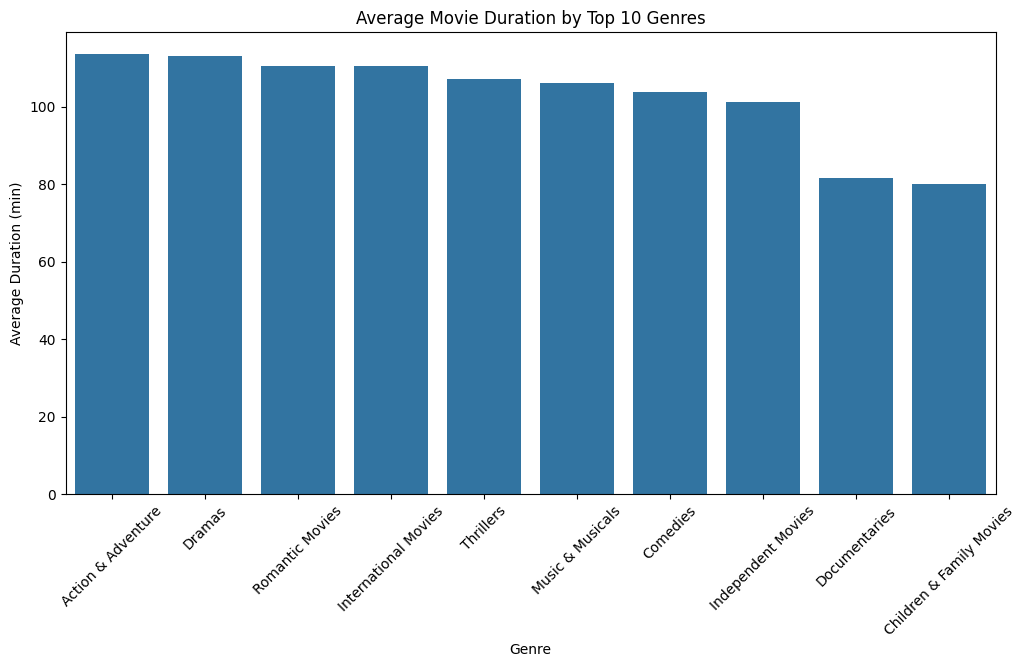

In [ ]:
# 3d. Barplot – Average Duration by Genre

plt.figure(figsize=(12,6))
sns.barplot(x=avg_duration_by_genre.index, y=avg_duration_by_genre['mean'])
plt.title('Average Movie Duration by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=45)
plt.show()


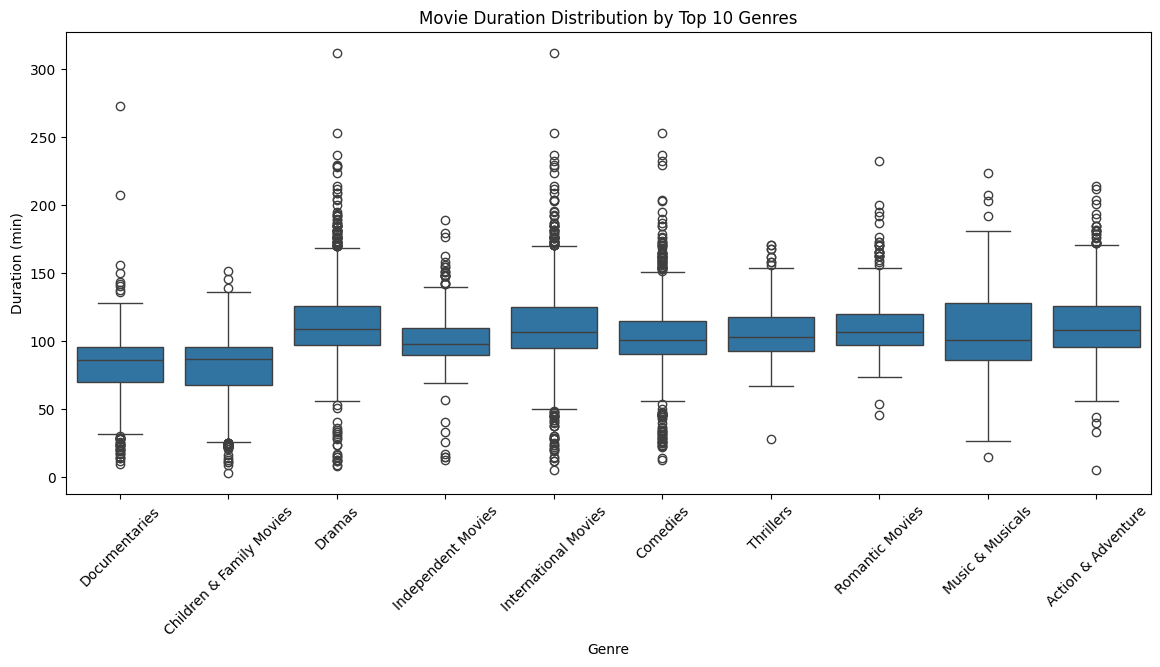

In [ ]:
# 3e. Boxplot – Distribution by Genre

plt.figure(figsize=(14,6))
sns.boxplot(x='genre', y='duration_min', data=movie_genre_df[movie_genre_df['genre'].isin(top_genres.index)])
plt.title('Movie Duration Distribution by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)
plt.show()


## PART 2 – TV Shows: Categorical vs Numeric Analysis

### Step 1: TV Shows – Numeric vs Rating

In [ ]:
# 1a. Summary Statistics

avg_seasons_by_rating = tv_data.groupby('rating')['duration_seasons'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)
print(avg_seasons_by_rating)


              mean  median  count
rating                           
TV-Y7     2.020619     2.0    194
TV-Y7-FV  2.000000     2.0      1
TV-Y      1.851429     1.0    175
TV-G      1.851064     1.0     94
TV-14     1.808219     1.0    730
TV-MA     1.683290     1.0   1143
TV-PG     1.629283     1.0    321
NR        1.500000     1.0      4
R         1.000000     1.0      2


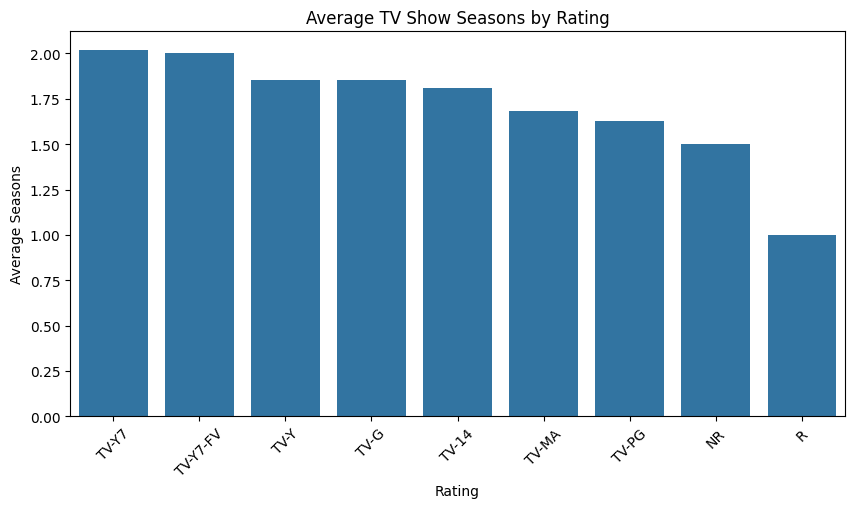

In [ ]:
# 1b. Barplot – Average Seasons by Rating

plt.figure(figsize=(10,5))
sns.barplot(x=avg_seasons_by_rating.index, y=avg_seasons_by_rating['mean'])
plt.title('Average TV Show Seasons by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.show()

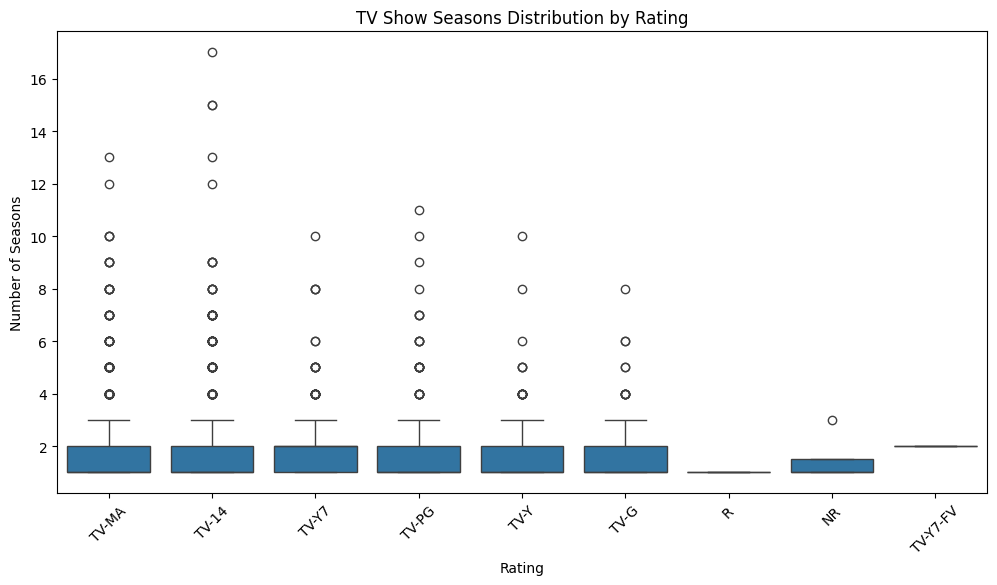

In [ ]:
# 1c. Boxplot – Distribution by Rating

plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='duration_seasons', data=tv_data)
plt.title('TV Show Seasons Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45)
plt.show()


### Step 2 – TV Shows: Numeric vs Country

In [ ]:
# 2a. Top Countries by TV Show Count

top_countries_tv = tv_data['country'].value_counts().head(10).index
print(top_countries_tv)


Index(['United States', 'Unknown', 'United Kingdom', 'Japan', 'South Korea',
       'India', 'Taiwan', 'Canada', 'France', 'Spain'],
      dtype='object', name='country')


In [ ]:
# 2b. Summary Statistics

avg_seasons_by_country = tv_data[tv_data['country'].isin(top_countries_tv)].groupby('country')['duration_seasons'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)
print(avg_seasons_by_country)


                    mean  median  count
country                                
Canada          2.576271     2.0     59
United States   2.290451     1.0    754
United Kingdom  1.900943     1.0    212
Spain           1.812500     1.0     48
Japan           1.580838     1.0    167
France          1.367347     1.0     49
Unknown         1.233333     1.0    390
South Korea     1.177215     1.0    158
India           1.164557     1.0     79
Taiwan          1.014706     1.0     68


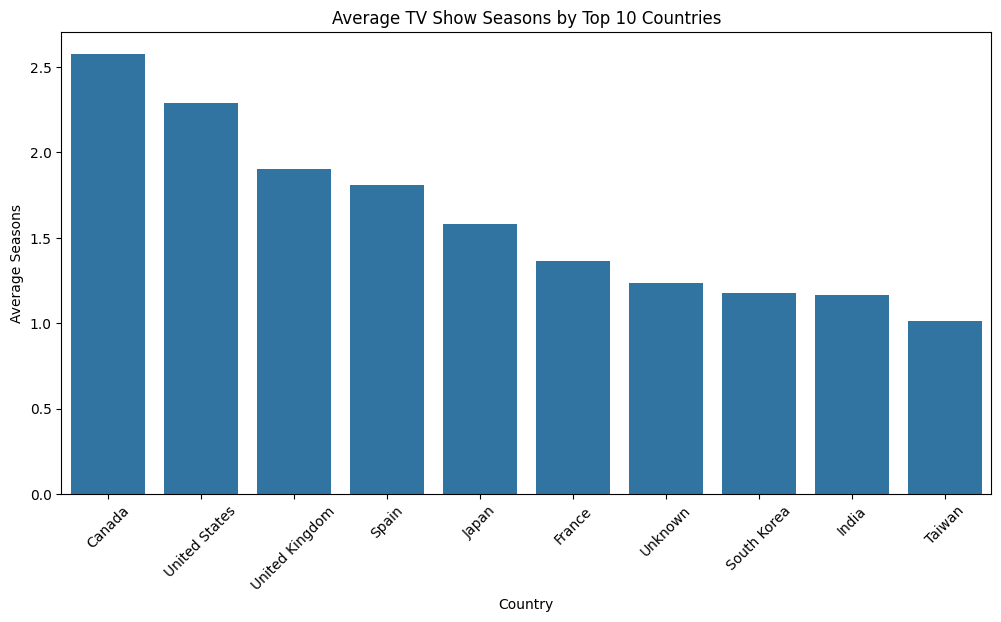

In [ ]:
# 2c. Barplot – Average Seasons by Country

plt.figure(figsize=(12,6))
sns.barplot(x=avg_seasons_by_country.index, y=avg_seasons_by_country['mean'])
plt.title('Average TV Show Seasons by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.show()


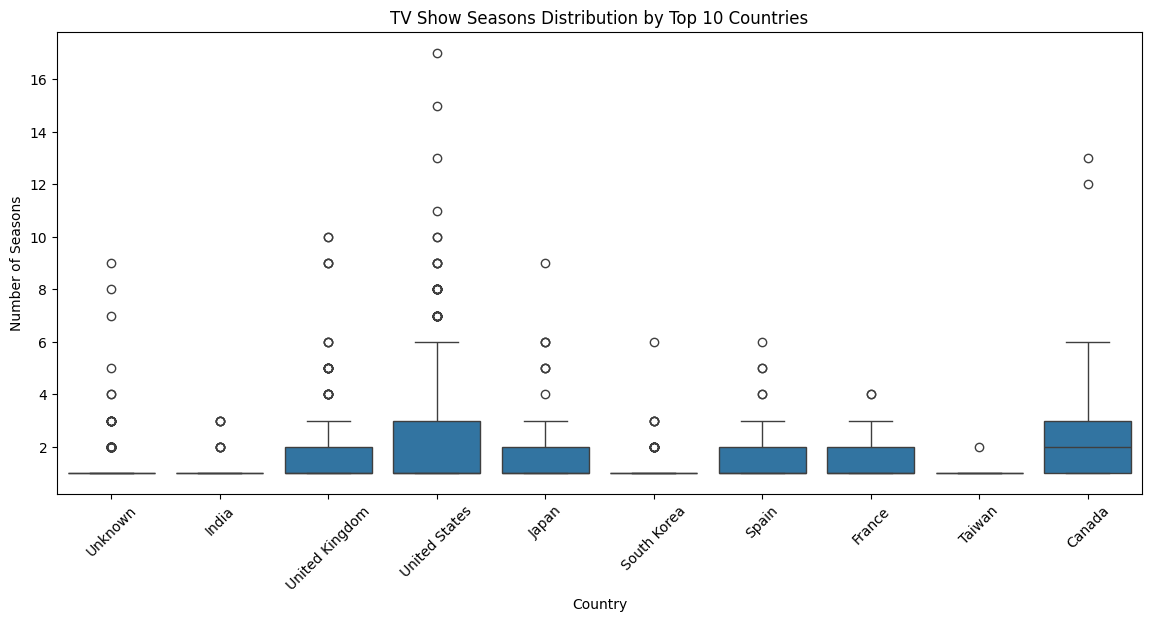

In [ ]:
# 2d. Boxplot – Distribution by Country

plt.figure(figsize=(14,6))
sns.boxplot(x='country', y='duration_seasons', data=tv_data[tv_data['country'].isin(top_countries_tv)])
plt.title('TV Show Seasons Distribution by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45)
plt.show()


### Step 3 – TV Shows: Numeric vs Genre

In [ ]:
# 3a. Split Multiple Genres / Split genres into separate rows

tv_genres = tv_data['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
tv_genre_df = tv_data.join(tv_genres.rename('genre'))


In [ ]:
# 3b. Top Genres by TV Show Count

top_tv_genres = tv_genre_df['genre'].value_counts().head(10)
print(top_tv_genres)


genre
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


In [ ]:
# 3c. Summary Statistics

avg_seasons_by_genre = tv_genre_df[tv_genre_df['genre'].isin(top_tv_genres.index)].groupby('genre')['duration_seasons'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)
print(avg_seasons_by_genre)


                            mean  median  count
genre                                          
TV Comedies             2.101222     1.0    573
Kids' TV                1.979911     2.0    448
TV Dramas               1.850394     1.0    762
British TV Shows        1.817460     1.0    252
Crime TV Shows          1.707889     1.0    469
Anime Series            1.574713     1.0    174
Reality TV              1.552941     1.0    255
International TV Shows  1.409192     1.0   1349
Romantic TV Shows       1.397297     1.0    370
Docuseries              1.327411     1.0    394


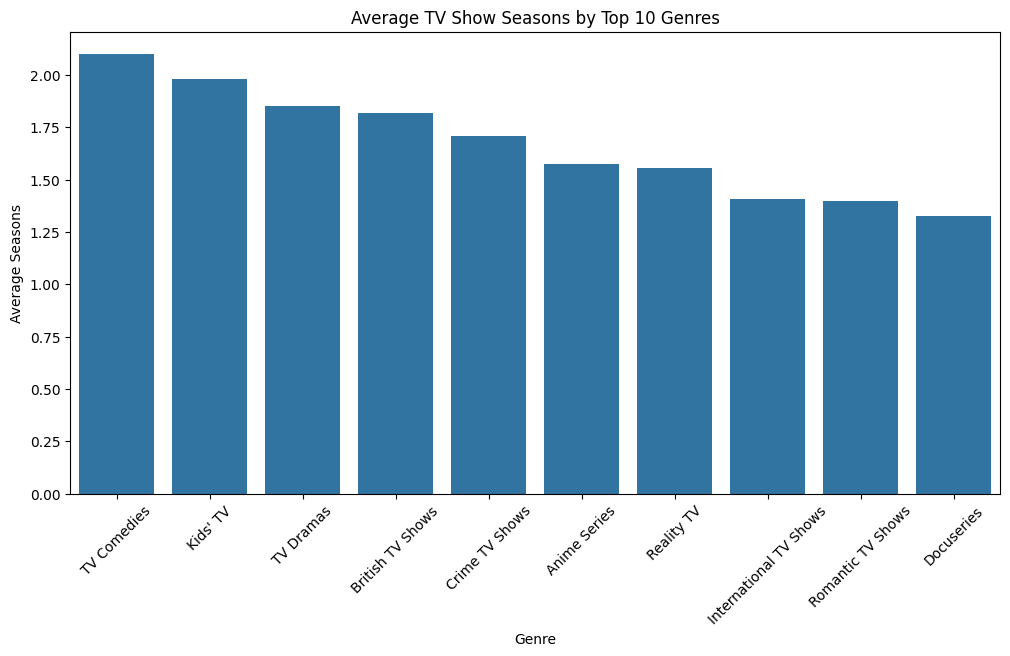

In [ ]:
# 3d. Barplot – Average Seasons by Genre

plt.figure(figsize=(12,6))
sns.barplot(x=avg_seasons_by_genre.index, y=avg_seasons_by_genre['mean'])
plt.title('Average TV Show Seasons by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.show()


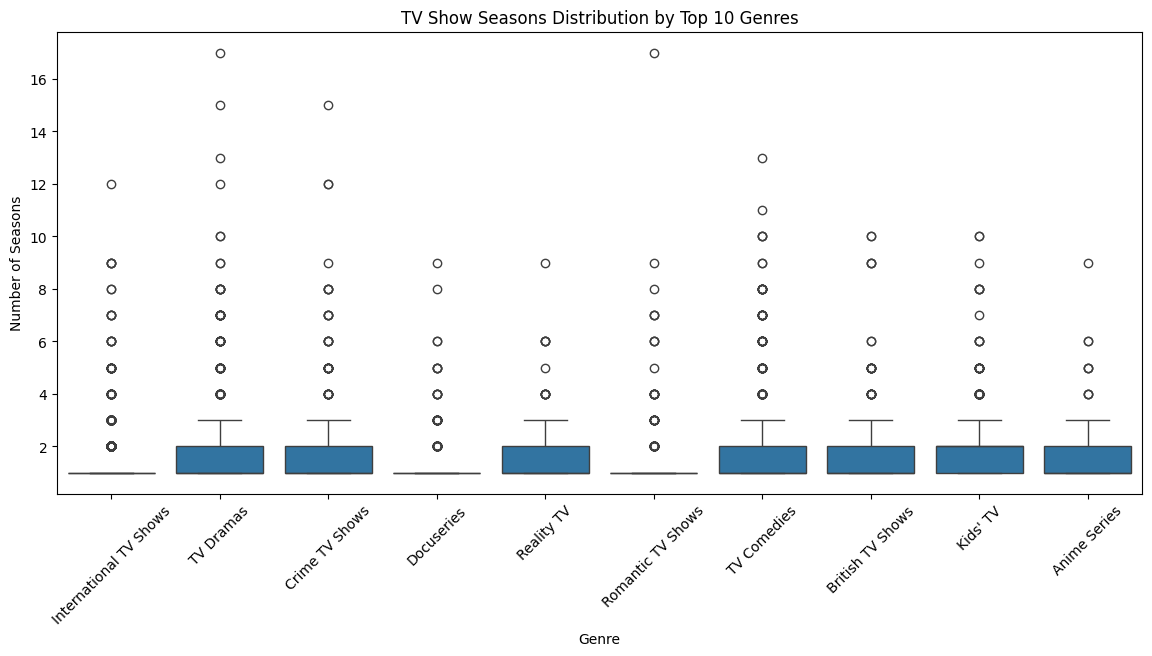

In [ ]:
# 3e. Boxplot – Distribution by Genre

plt.figure(figsize=(14,6))
sns.boxplot(x='genre', y='duration_seasons', data=tv_genre_df[tv_genre_df['genre'].isin(top_tv_genres.index)])
plt.title('TV Show Seasons Distribution by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45)
plt.show()


# Categorical vs Categorical Analysis

Purpose:

See how two categorical variables relate to each other.

Example:

rating vs country → which ratings are more common in which countries

rating vs listed_in → which ratings are common in which genres

### Intro

In [ ]:
# 1. Contingency Table (Cross-tab)

pd.crosstab(data['rating'], data['country'])


country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
rating,,,,,,,,,,,,,,,,,,,,,
G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NR,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
PG,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
PG-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TV-14,1,0,7,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,3,0,0
TV-G,0,0,2,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
TV-MA,0,1,39,0,1,1,1,1,1,7,...,1,1,0,0,1,0,0,3,1,0


In [ ]:
# 2. Normalized Table (Percentage)

pd.crosstab(data['rating'], data['country'], normalize='index') * 100


country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
rating,,,,,,,,,,,,,,,,,,,,,
G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NR,0.000000,0.000000,2.531646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.265823,0.000000,0.000000,0.000000
PG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PG-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R,0.000000,0.000000,0.125156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TV-14,0.046361,0.000000,0.324525,0.046361,0.046361,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046361,0.000000,0.139082,0.000000,0.000000
TV-G,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.454545,0.454545,0.000000,0.000000,0.000000,0.454545,0.000000,0.454545
TV-MA,0.000000,0.031201,1.216849,0.000000,0.031201,0.031201,0.031201,0.031201,0.031201,0.218409,...,0.031201,0.031201,0.000000,0.000000,0.031201,0.000000,0.000000,0.093604,0.031201,0.000000


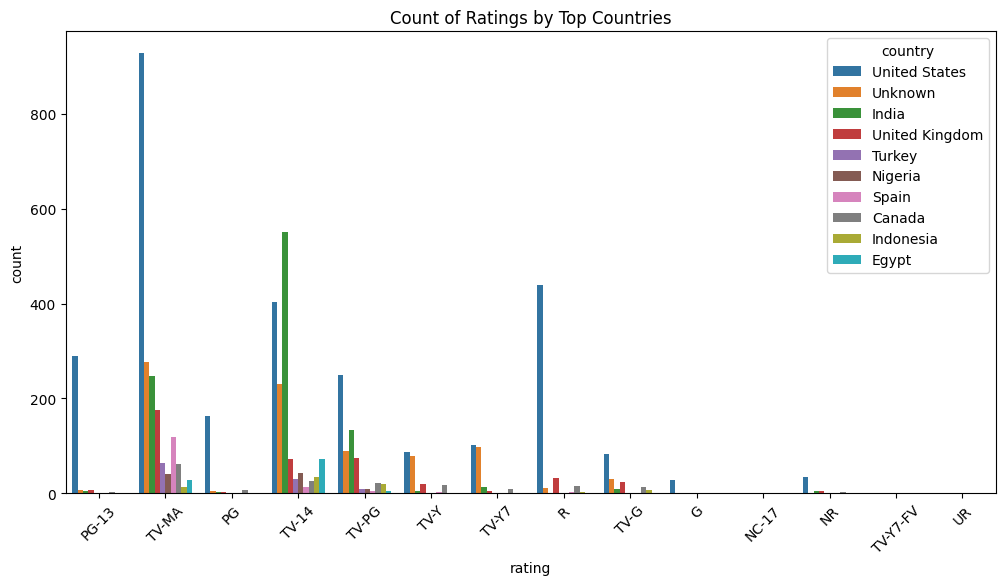

In [ ]:
# 3. Countplot with Hue (Visual)

plt.figure(figsize=(12,6))
sns.countplot(x='rating', hue='country', data=data[data['country'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title('Count of Ratings by Top Countries')
plt.show()


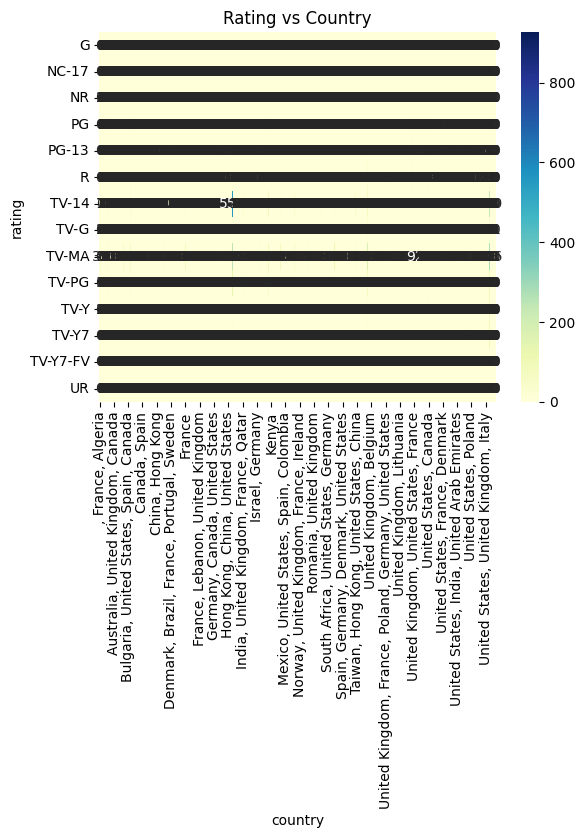

In [ ]:
# 4. Heatmap

cross = pd.crosstab(data['rating'], data['country'])
sns.heatmap(cross, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Rating vs Country')
plt.show()


## PART 1 – Movies: Categorical vs Categorical

#### Step 1: Rating vs Country

In [ ]:
# 1a. Contingency Table

top_countries = movie_data['country'].value_counts().head(10).index

cross_rating_country = pd.crosstab(
    movie_data[movie_data['country'].isin(top_countries)]['rating'],
    movie_data[movie_data['country'].isin(top_countries)]['country']
)

print(cross_rating_country)
print("-"*100)
print("Shows number of movies for each rating in the top 10 countries.")


country   Canada  Egypt  India  Indonesia  Nigeria  Spain  Turkey  \
rating                                                              
G              1      0      0          0        0      0       0   
NC-17          1      0      0          0        0      0       0   
NR             2      0      4          0        1      0       1   
PG             8      0      2          0        0      1       0   
PG-13          3      0      4          0        0      1       0   
R             16      0      1          2        0      2       0   
TV-14         13     61    526         33       40      9      23   
TV-G           6      1      6          8        0      0       1   
TV-MA         42     26    215         14       36     81      44   
TV-PG         15      4    124         20        9      2       7   
TV-Y          12      0      0          0        0      1       0   
TV-Y7          3      0     10          0        0      0       0   
TV-Y7-FV       0      0      1    

In [ ]:
# 1b. Normalized Table (Percentages)

cross_rating_country_percent = pd.crosstab(
    movie_data[movie_data['country'].isin(top_countries)]['rating'],
    movie_data[movie_data['country'].isin(top_countries)]['country'],
    normalize='index'
) * 100
print(cross_rating_country_percent)
print("-"*100)
print("Shows percentage distribution of ratings across countries.")

country      Canada     Egypt      India  Indonesia   Nigeria     Spain  \
rating                                                                    
G          3.333333  0.000000   0.000000   0.000000  0.000000  0.000000   
NC-17     50.000000  0.000000   0.000000   0.000000  0.000000  0.000000   
NR         4.545455  0.000000   9.090909   0.000000  2.272727  0.000000   
PG         4.371585  0.000000   1.092896   0.000000  0.000000  0.546448   
PG-13      0.958466  0.000000   1.277955   0.000000  0.000000  0.319489   
R          3.174603  0.000000   0.198413   0.396825  0.000000  0.396825   
TV-14      1.216090  5.706268  49.204864   3.086997  3.741815  0.841908   
TV-G       6.666667  1.111111   6.666667   8.888889  0.000000  0.000000   
TV-MA      3.240741  2.006173  16.589506   1.080247  2.777778  6.250000   
TV-PG      3.836317  1.023018  31.713555   5.115090  2.301790  0.511509   
TV-Y      11.538462  0.000000   0.000000   0.000000  0.000000  0.961538   
TV-Y7      2.654867  0.00

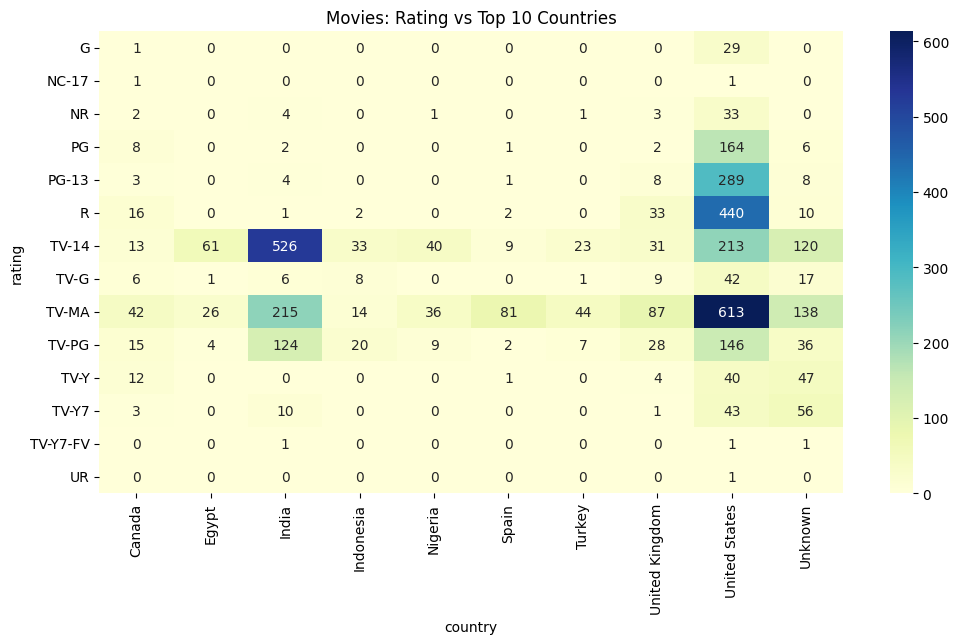

In [ ]:
# 1c. Heatmap Visualization

plt.figure(figsize=(12,6))
sns.heatmap(cross_rating_country, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Movies: Rating vs Top 10 Countries')
plt.show()


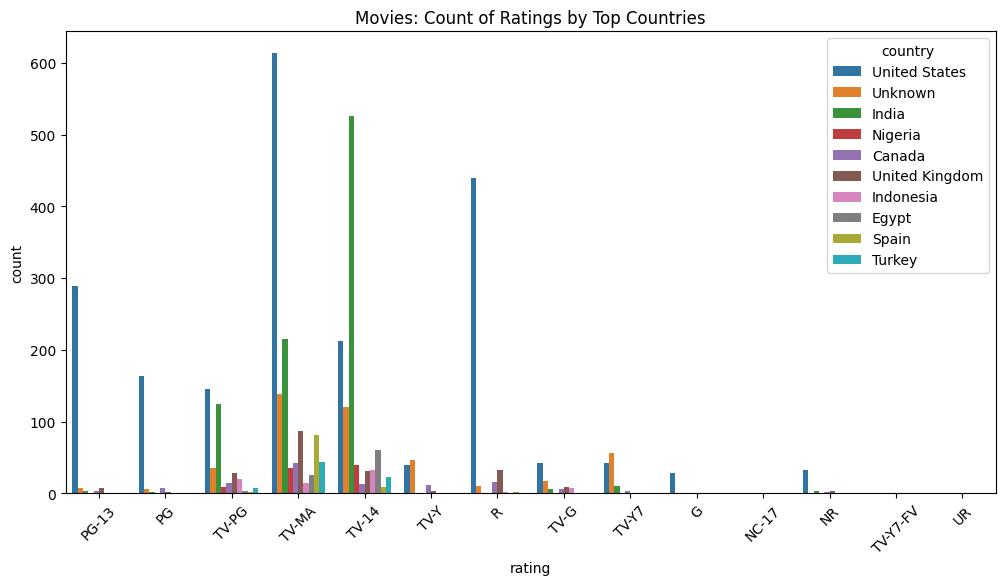

In [ ]:
# 1d. Countplot with Hue

plt.figure(figsize=(12,6))
sns.countplot(x='rating', hue='country', data=movie_data[movie_data['country'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title('Movies: Count of Ratings by Top Countries')
plt.show()


### Step 2 – Movies: Rating vs Genre

In [ ]:
# 2a. Split Genres into Separate Rows

# Split genres into separate rows and reset index
movie_genres = movie_data['listed_in'].str.split(', ', expand=True).stack().reset_index()
movie_genres = movie_genres.rename(columns={0: 'genre'})

# Add the corresponding rating for each row
movie_genres['rating'] = movie_data.loc[movie_genres['level_0'], 'rating'].values


In [ ]:
# 2b. Filter Top Genres

top_genres = movie_genres['genre'].value_counts().head(10).index
movie_genres_top = movie_genres[movie_genres['genre'].isin(top_genres)]


In [ ]:
# 2c. Create Contingency Table (Rating vs Genre)

cross_rating_genre = pd.crosstab(movie_genres_top['rating'], movie_genres_top['genre'])
print(cross_rating_genre)


genre     Action & Adventure  Children & Family Movies  Comedies  \
rating                                                             
G                          1                        33        11   
NC-17                      0                         0         2   
NR                         9                         0        14   
PG                        32                       195       148   
PG-13                    148                        11       168   
R                        220                         0       180   
TV-14                    213                        18       465   
TV-G                       0                        51        29   
TV-MA                    201                         1       431   
TV-PG                     33                        85       153   
TV-Y                       0                       113        21   
TV-Y7                      0                       129        47   
TV-Y7-FV                   1                    

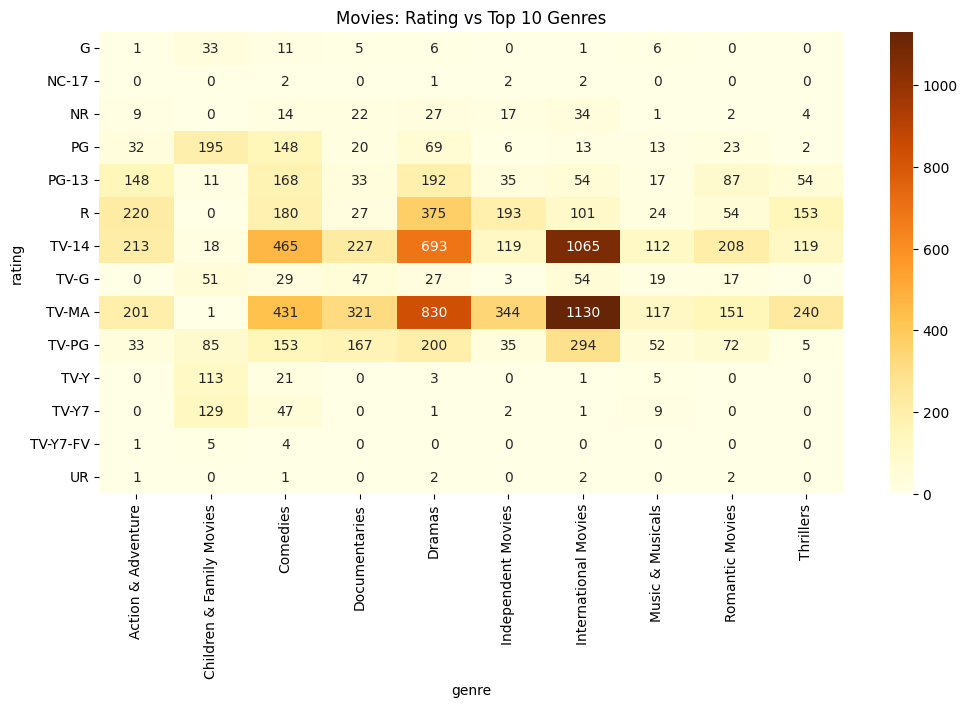

In [ ]:
# 2d. Visualize Heatmap

plt.figure(figsize=(12,6))
sns.heatmap(cross_rating_genre, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Movies: Rating vs Top 10 Genres')
plt.show()



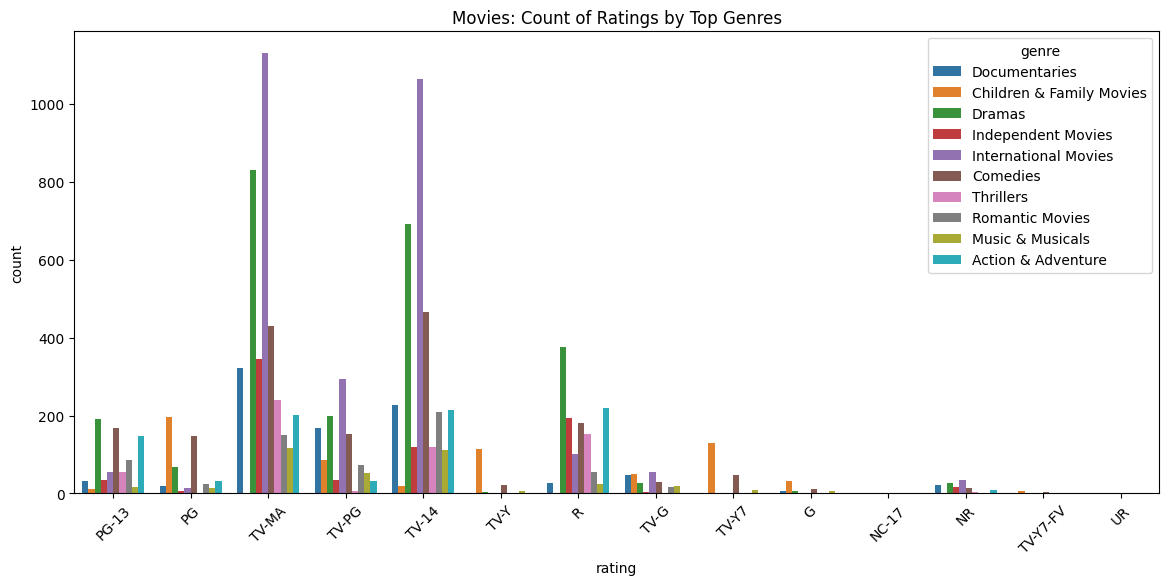

In [ ]:
# 2e. Countplot with Hue

plt.figure(figsize=(14,6))
sns.countplot(x='rating', hue='genre', data=movie_genres_top)
plt.xticks(rotation=45)
plt.title('Movies: Count of Ratings by Top Genres')
plt.show()


### Step 3 – Movies: Country vs Genre

In [ ]:
# 3a. Use the movie_genres DataFrame

# Add country corresponding to each row
movie_genres['country'] = movie_data.loc[movie_genres['level_0'], 'country'].values


In [ ]:
# 3b. Filter Top Countries and Genres

top_countries = movie_data['country'].value_counts().head(10).index
top_genres = movie_genres['genre'].value_counts().head(10).index

movie_genres_top = movie_genres[
    (movie_genres['country'].isin(top_countries)) &
    (movie_genres['genre'].isin(top_genres))
]


In [ ]:
# 3c. Create Contingency Table (Country vs Genre)

cross_country_genre = pd.crosstab(movie_genres_top['country'], movie_genres_top['genre'])
print(cross_country_genre)


genre           Action & Adventure  Children & Family Movies  Comedies  \
country                                                                  
Canada                          12                        31        39   
Egypt                           14                         1        57   
India                          127                        18       308   
Indonesia                        3                         6        15   
Nigeria                          3                         0        39   
Spain                            5                         1        34   
Turkey                           3                         2        56   
United Kingdom                  19                         8        32   
United States                  249                       272       524   
Unknown                         42                       106        94   

genre           Documentaries  Dramas  Independent Movies  \
country                                           

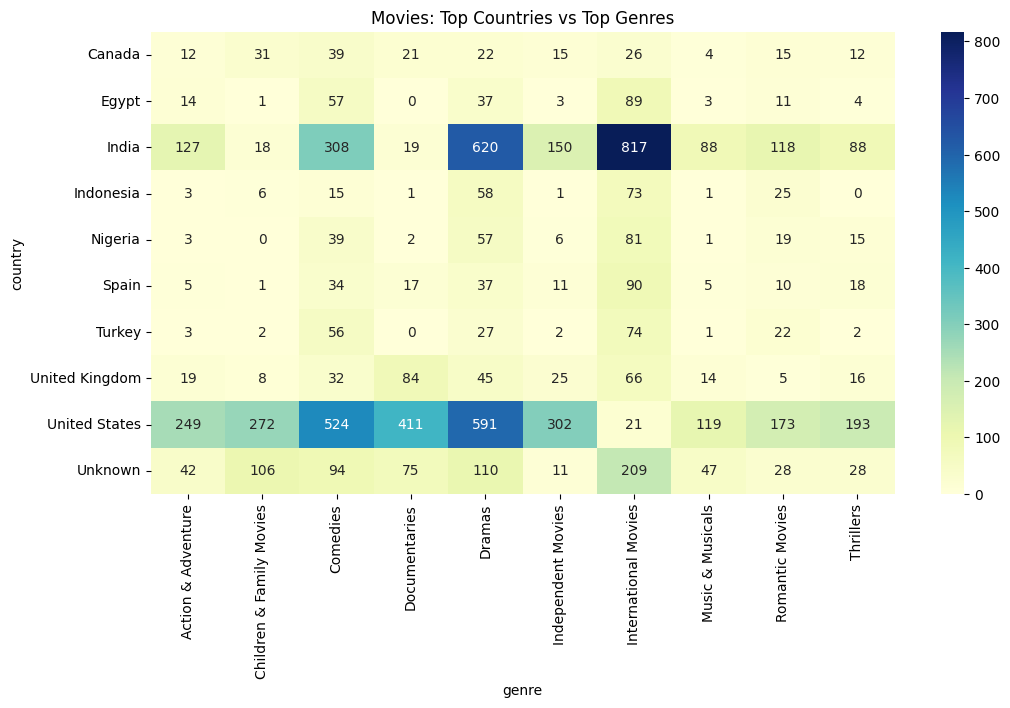

In [ ]:
# 3d. Visualize Heatmap

plt.figure(figsize=(12,6))
sns.heatmap(cross_country_genre, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Movies: Top Countries vs Top Genres')
plt.show()


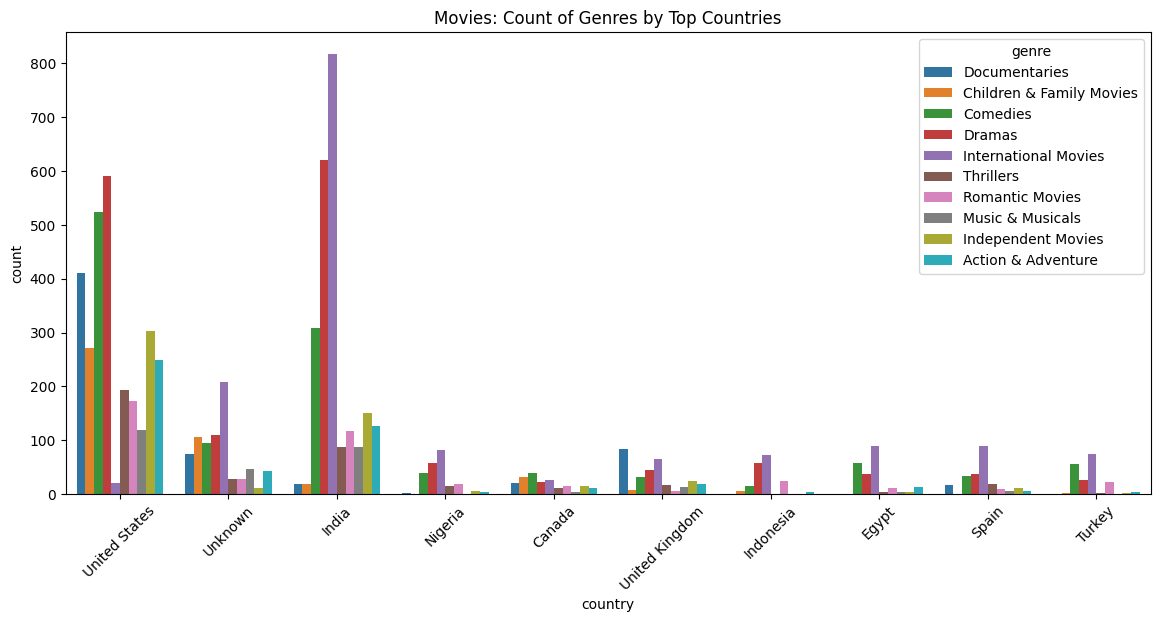

In [ ]:
# 3e. Countplot with Hue

plt.figure(figsize=(14,6))
sns.countplot(x='country', hue='genre', data=movie_genres_top)
plt.xticks(rotation=45)
plt.title('Movies: Count of Genres by Top Countries')
plt.show()


## PART 2 – TV Shows: Categorical vs Categorical

### Step 1: Rating vs Country

In [ ]:
# 1a. Top Countries by TV Show Count

top_countries_tv = tv_data['country'].value_counts().head(10).index


In [ ]:
# 1b. Contingency Table: Rating vs Country

cross_rating_country_tv = pd.crosstab(
    tv_data[tv_data['country'].isin(top_countries_tv)]['rating'],
    tv_data[tv_data['country'].isin(top_countries_tv)]['country']
)
print(cross_rating_country_tv)


country   Canada  France  India  Japan  South Korea  Spain  Taiwan  \
rating                                                               
NR             0       0      0      0            0      1       0   
R              0       0      0      0            0      0       0   
TV-14         13       1     24     70           80      4      36   
TV-G           8       2      3      1            1      1       0   
TV-MA         19      32     33     63           53     38      24   
TV-PG          7       1     10     18           14      3       8   
TV-Y           5      10      5      1            4      1       0   
TV-Y7          6       3      4     14            6      0       0   
TV-Y7-FV       1       0      0      0            0      0       0   

country   United Kingdom  United States  Unknown  
rating                                            
NR                     2              1        0  
R                      0              0        1  
TV-14                 41 

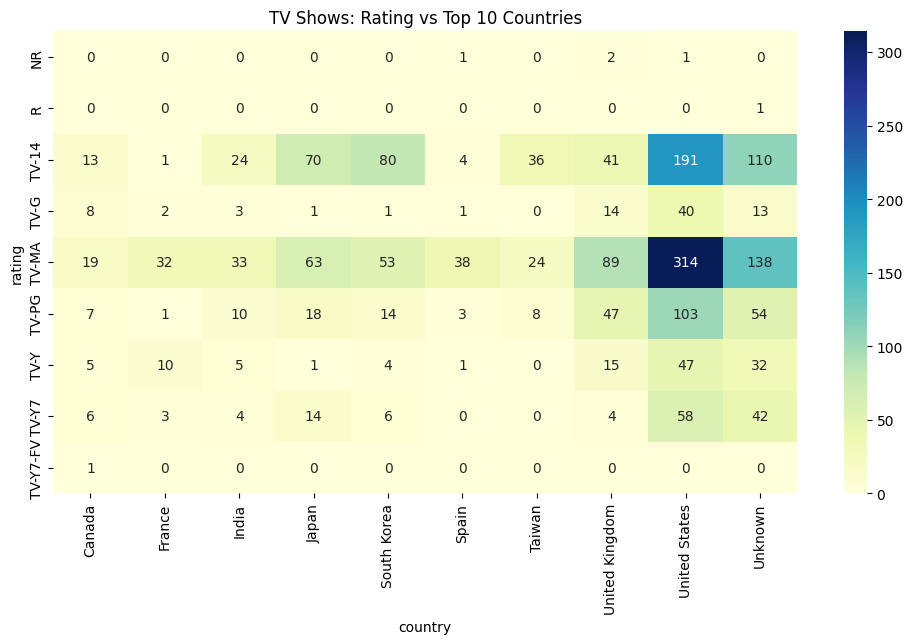

In [ ]:
# 1c. Heatmap Visualization

plt.figure(figsize=(12,6))
sns.heatmap(cross_rating_country_tv, annot=True, fmt='d', cmap='YlGnBu')
plt.title('TV Shows: Rating vs Top 10 Countries')
plt.show()


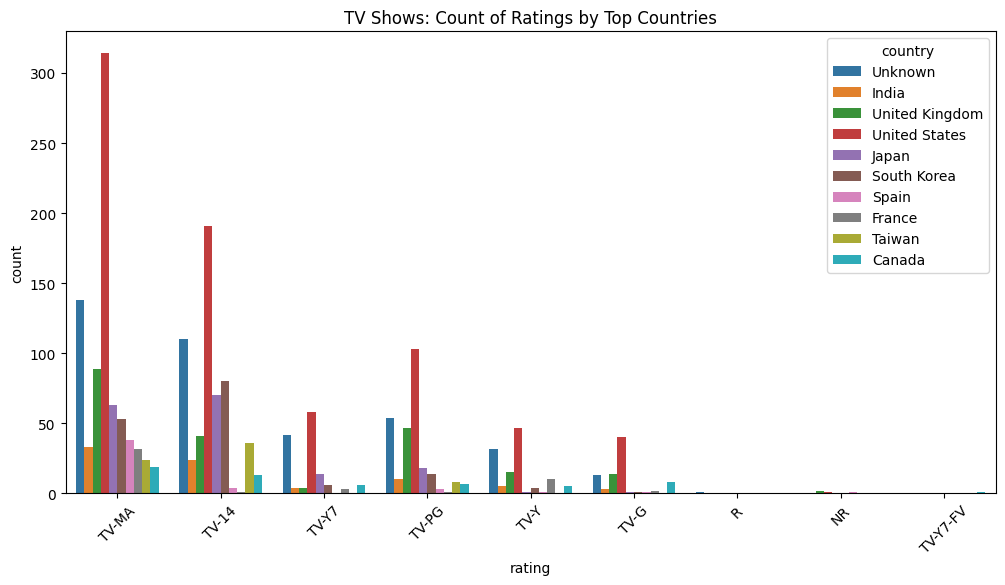

In [ ]:
# 1d. Countplot with Hue

plt.figure(figsize=(12,6))
sns.countplot(x='rating', hue='country', data=tv_data[tv_data['country'].isin(top_countries_tv)])
plt.xticks(rotation=45)
plt.title('TV Shows: Count of Ratings by Top Countries')
plt.show()


### Step 2 – TV Shows: Rating vs Genre

In [ ]:
# 2a. Split Genres into Separate Rows

# Split genres into separate rows and reset index
tv_genres = tv_data['listed_in'].str.split(', ', expand=True).stack().reset_index()
tv_genres = tv_genres.rename(columns={0: 'genre'})

# Add the corresponding rating for each row
tv_genres['rating'] = tv_data.loc[tv_genres['level_0'], 'rating'].values


In [ ]:
# 2b. Filter Top Genres

top_tv_genres = tv_genres['genre'].value_counts().head(10).index
tv_genres_top = tv_genres[tv_genres['genre'].isin(top_tv_genres)]


In [ ]:
# 2c. Contingency Table: Rating vs Genre

cross_rating_genre_tv = pd.crosstab(tv_genres_top['rating'], tv_genres_top['genre'])
print(cross_rating_genre_tv)


genre     Anime Series  British TV Shows  Crime TV Shows  Docuseries  \
rating                                                                 
NR                   0                 2               1           1   
R                    0                 0               0           0   
TV-14               70                46             110          92   
TV-G                 0                17               1          24   
TV-MA               59               107             350         179   
TV-PG               17                55               4          98   
TV-Y                 2                20               0           0   
TV-Y7               26                 5               3           0   
TV-Y7-FV             0                 0               0           0   

genre     International TV Shows  Kids' TV  Reality TV  Romantic TV Shows  \
rating                                                                      
NR                             2         0           

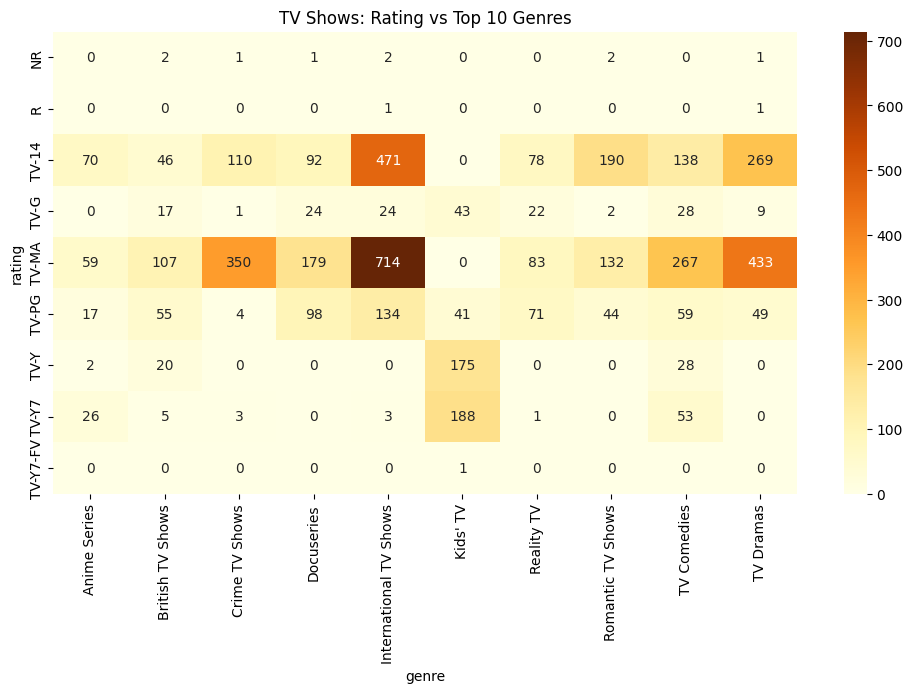

In [ ]:
# 2d. Heatmap Visualization

plt.figure(figsize=(12,6))
sns.heatmap(cross_rating_genre_tv, annot=True, fmt='d', cmap='YlOrBr')
plt.title('TV Shows: Rating vs Top 10 Genres')
plt.show()


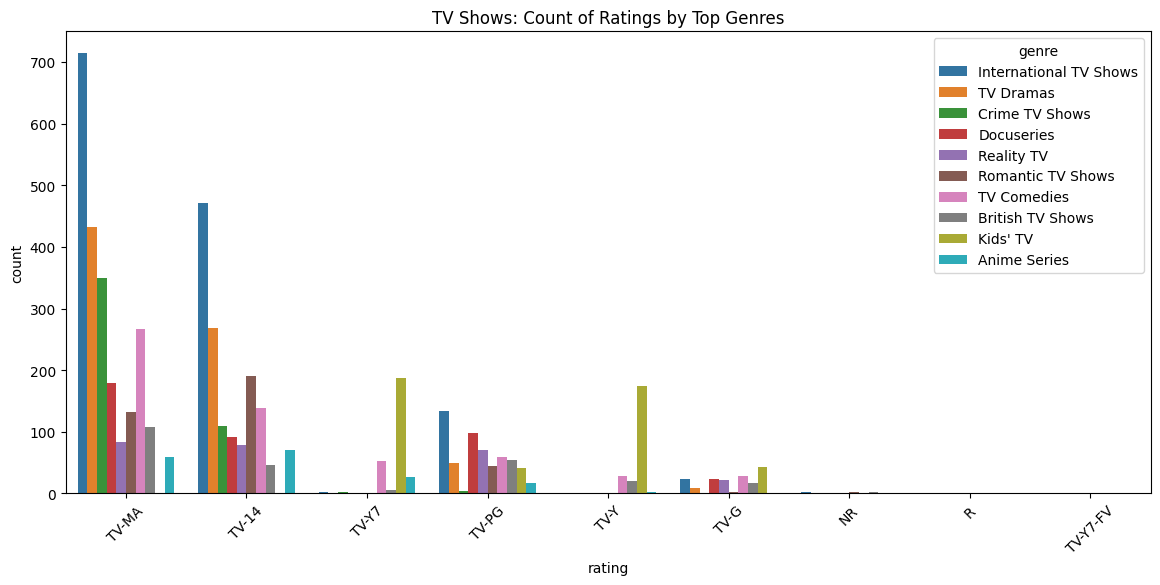

In [ ]:
# 2e. Countplot with Hue

plt.figure(figsize=(14,6))
sns.countplot(x='rating', hue='genre', data=tv_genres_top)
plt.xticks(rotation=45)
plt.title('TV Shows: Count of Ratings by Top Genres')
plt.show()


### Step 3 – TV Shows: Country vs Genre

In [ ]:
# 3a. Add Country to tv_genres DataFrame

tv_genres['country'] = tv_data.loc[tv_genres['level_0'], 'country'].values


In [ ]:
# 3b. Filter Top Countries and Top Genres

top_countries_tv = tv_data['country'].value_counts().head(10).index
top_tv_genres = tv_genres['genre'].value_counts().head(10).index

tv_genres_top = tv_genres[
    (tv_genres['country'].isin(top_countries_tv)) &
    (tv_genres['genre'].isin(top_tv_genres))
]


In [ ]:
# 3c. Contingency Table: Country vs Genre

cross_country_genre_tv = pd.crosstab(tv_genres_top['country'], tv_genres_top['genre'])
print(cross_country_genre_tv)


genre           Anime Series  British TV Shows  Crime TV Shows  Docuseries  \
country                                                                      
Canada                     0                 0               9           8   
France                     0                 0              14           5   
India                      0                 2               8           8   
Japan                    129                 0              14           1   
South Korea                0                 0              24           0   
Spain                      1                 1              20           5   
Taiwan                     0                 0               5           0   
United Kingdom             0               195              38          78   
United States              6                 5             111         172   
Unknown                   22                16              49          65   

genre           International TV Shows  Kids' TV  Reality TV  \

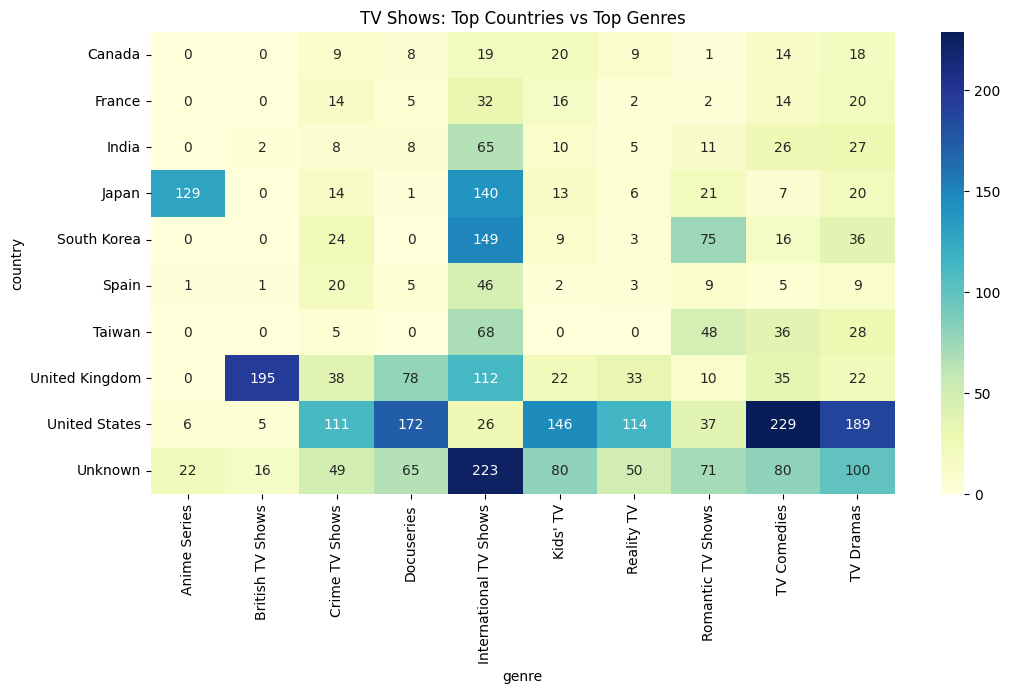

In [ ]:
# 3d. Heatmap Visualization

plt.figure(figsize=(12,6))
sns.heatmap(cross_country_genre_tv, annot=True, fmt='d', cmap='YlGnBu')
plt.title('TV Shows: Top Countries vs Top Genres')
plt.show()


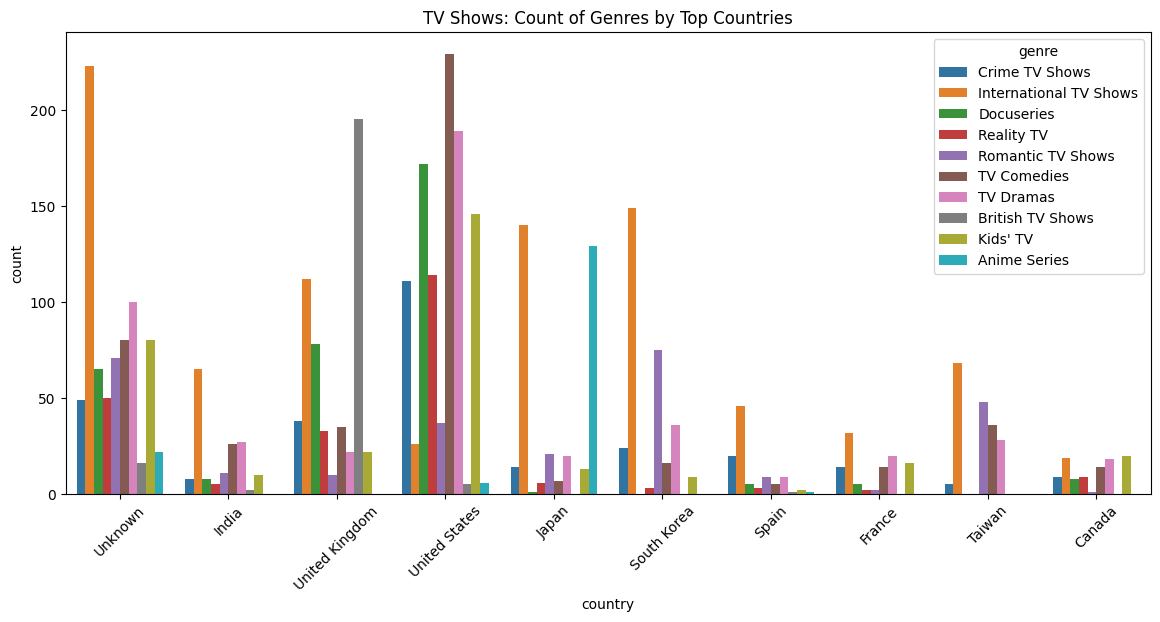

In [ ]:
# 3e. Countplot with Hue

plt.figure(figsize=(14,6))
sns.countplot(x='country', hue='genre', data=tv_genres_top)
plt.xticks(rotation=45)
plt.title('TV Shows: Count of Genres by Top Countries')
plt.show()


# correlation analysis

## numeric vs numeric relationships.

In [ ]:
# Step 1 – Select Numeric Columns

print(num_cols)

Index(['release_year', 'duration_min', 'duration_seasons', 'year_added'], dtype='object')


In [ ]:
# Step 2 – Correlation Matrix

corr_matrix = data[num_cols].corr()
print(corr_matrix)


                  release_year  duration_min  duration_seasons  year_added
release_year          1.000000     -0.206248         -0.081586    0.110567
duration_min         -0.206248      1.000000               NaN    0.124195
duration_seasons     -0.081586           NaN          1.000000    0.106182
year_added            0.110567      0.124195          0.106182    1.000000


Shows pairwise correlation between numeric variables.

Values range from -1 to 1:

1 → perfect positive correlation

-1 → perfect negative correlation

0 → no correlation

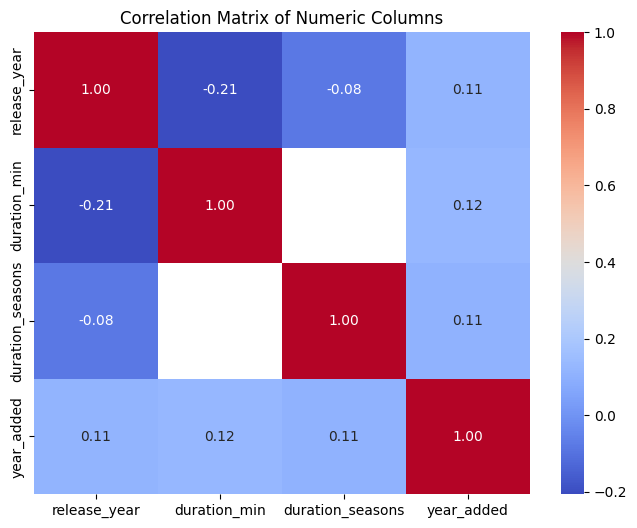

In [ ]:
# Step 3 – Heatmap Visualization

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


Easy to see which variables are strongly correlated.

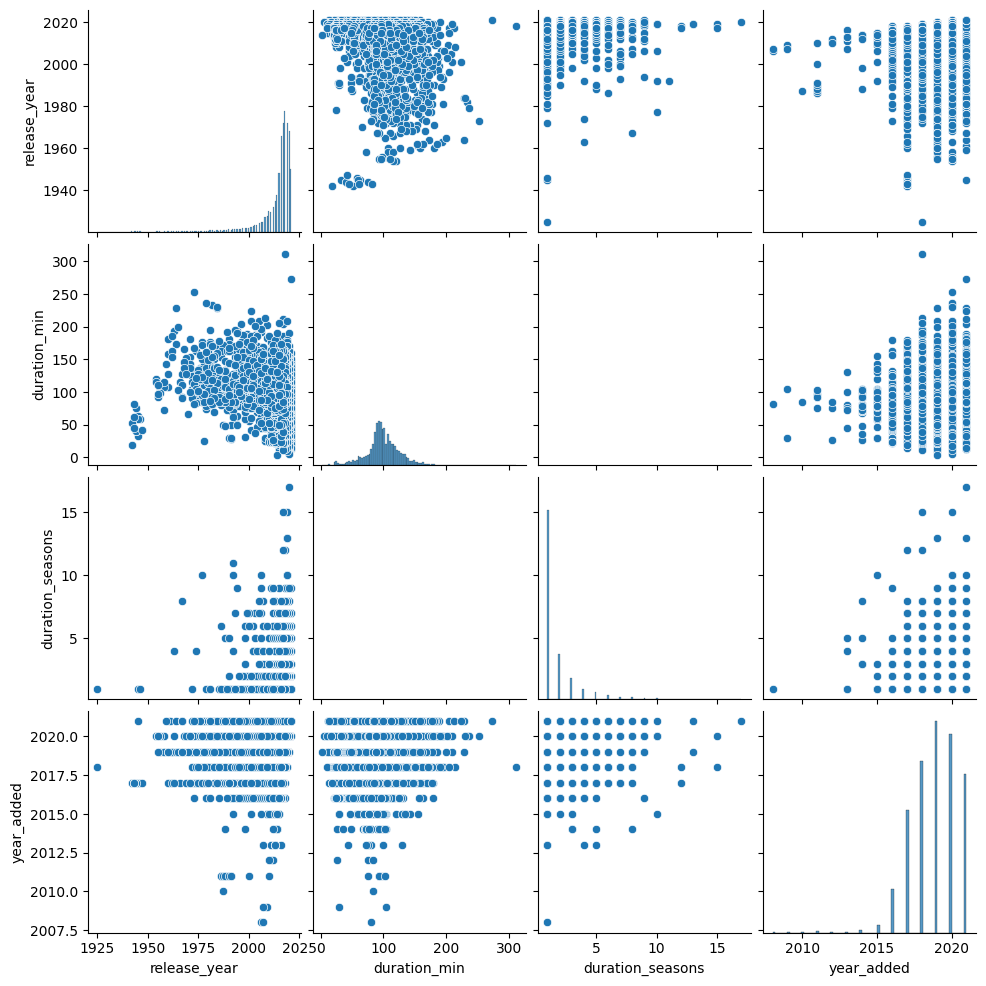

In [ ]:
# Step 4 – Pairplot

sns.pairplot(data[num_cols])
plt.show()


Shows scatterplots between each numeric variable.

Helps to visually detect relationships and outliers.

## Correlation between Numeric and Categorical variables.

In [ ]:
# Step 1 – Encode Categorical Columns

print("Categorical columns:", cat_cols)

# Create a new DataFrame with encoded categories
data_encoded = data.copy()
for col in cat_cols:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes


Categorical columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Step 2 – Compute Correlation Matrix

corr_matrix_all = data_encoded.corr()


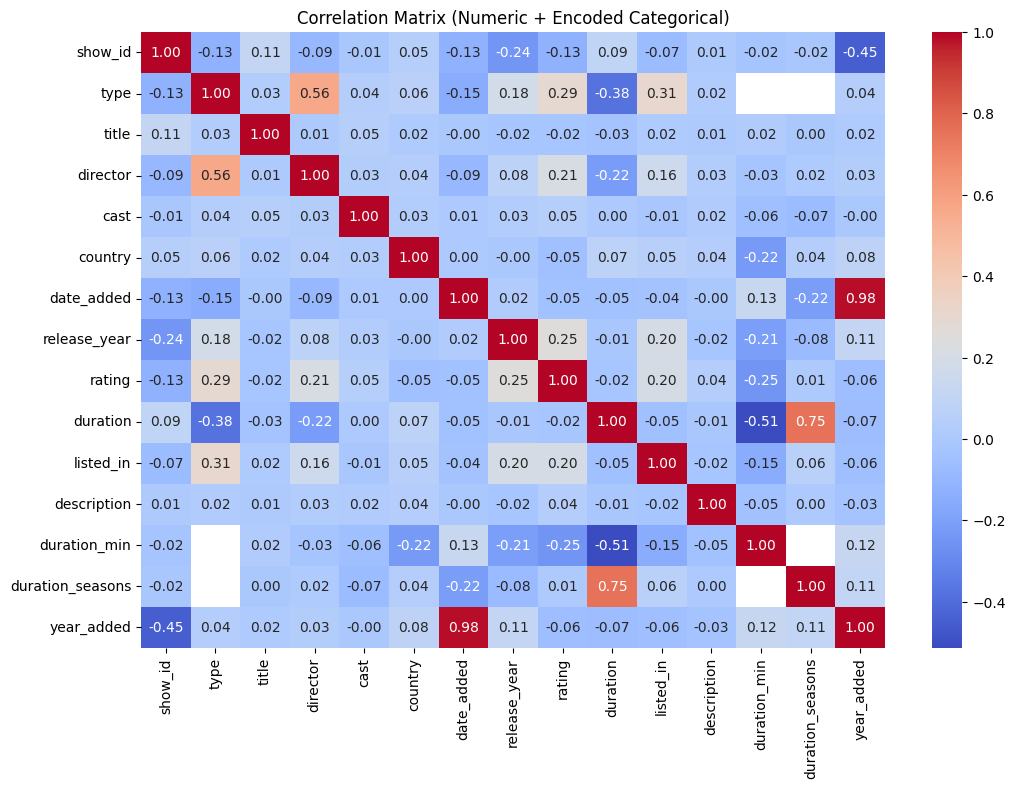

In [ ]:
# Step 3 – Correlation Heatmap (Numeric + Categorical)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_all, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numeric + Encoded Categorical)')
plt.show()


In [ ]:
# Step 4 – Focus on Numeric vs Categorical Correlation

for num_col in num_cols:
    print(f"\nCorrelations of '{num_col}' with categorical columns:")
    print(corr_matrix_all[num_col][cat_cols].sort_values(ascending=False))



Correlations of 'release_year' with categorical columns:
rating         0.250659
listed_in      0.197505
type           0.182663
director       0.075992
cast           0.028593
country       -0.003471
duration      -0.005692
title         -0.018004
description   -0.018926
show_id       -0.243790
Name: release_year, dtype: float64

Correlations of 'duration_min' with categorical columns:
title          0.022594
show_id       -0.023868
director      -0.025813
description   -0.045192
cast          -0.056342
listed_in     -0.148624
country       -0.224285
rating        -0.247362
duration      -0.513053
type                NaN
Name: duration_min, dtype: float64

Correlations of 'duration_seasons' with categorical columns:
duration       0.752101
listed_in      0.059205
country        0.037686
director       0.015997
rating         0.011673
description    0.003822
title          0.000930
show_id       -0.016524
cast          -0.073308
type                NaN
Name: duration_seasons, dtype: f

## Categorical vs Categorical correlation

In [ ]:
# Contingency Tables (Cross-tab)

pd.crosstab(data['rating'], data['country'])


country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
rating,,,,,,,,,,,,,,,,,,,,,
G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NR,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
PG,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
PG-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TV-14,1,0,7,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,3,0,0
TV-G,0,0,2,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
TV-MA,0,1,39,0,1,1,1,1,1,7,...,1,1,0,0,1,0,0,3,1,0


In [ ]:
# Normalized Contingency Table

pd.crosstab(data['rating'], data['country'], normalize='index') * 100


country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
rating,,,,,,,,,,,,,,,,,,,,,
G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NR,0.000000,0.000000,2.531646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.265823,0.000000,0.000000,0.000000
PG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PG-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R,0.000000,0.000000,0.125156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TV-14,0.046361,0.000000,0.324525,0.046361,0.046361,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046361,0.000000,0.139082,0.000000,0.000000
TV-G,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.454545,0.454545,0.000000,0.000000,0.000000,0.454545,0.000000,0.454545
TV-MA,0.000000,0.031201,1.216849,0.000000,0.031201,0.031201,0.031201,0.031201,0.031201,0.218409,...,0.031201,0.031201,0.000000,0.000000,0.031201,0.000000,0.000000,0.093604,0.031201,0.000000


In [ ]:
# Chi-Square Test of Independence

from scipy.stats import chi2_contingency

cross = pd.crosstab(data['rating'], data['country'])
chi2, p, dof, expected = chi2_contingency(cross)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi2 Statistic: 18242.432501277424, p-value: 0.0


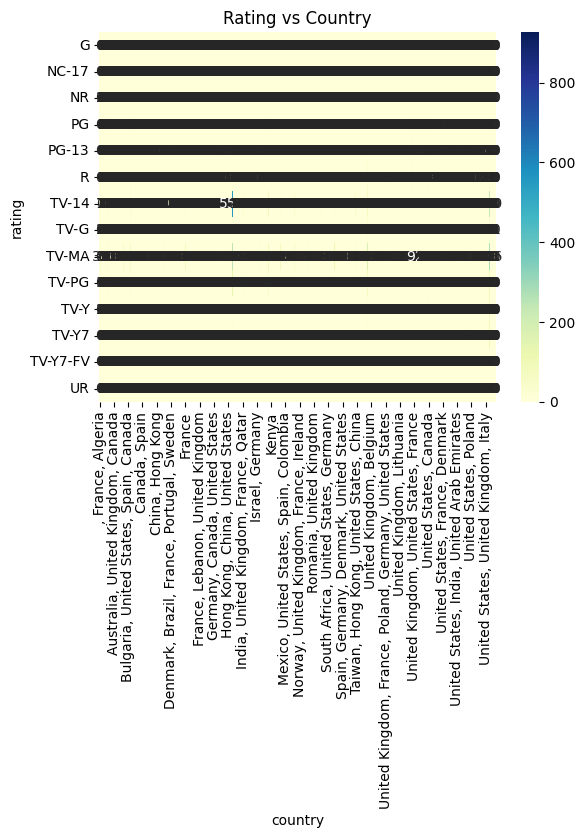

In [ ]:
# Heatmap for Visualization

sns.heatmap(cross, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Rating vs Country')
plt.show()
